# Лабораторна робота No4
Виконав студент групи ФБ-35 Ворона Сергій

In [60]:
import pandas as pd
import numpy as np
import urllib.request
import os
import zipfile
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import re


## Перший рівень

Встановлення файлу

In [61]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"

zip_file = "./Data/household_power_consumption.zip"
data_file = "./Data/household_power_consumption.txt"

urllib.request.urlretrieve(url, zip_file)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("./Data")
os.remove(zip_file)


### За допомогою pandas dataframe

Підготовка даних

In [62]:
df = pd.read_csv(data_file, sep=';', low_memory=False)
not_numeric = ["Date", "Time"]

for col in df.columns:
    if col not in not_numeric:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [63]:
def global_active_power_more_five(data, value):
    glob = data[(data["Global_active_power"] > value)]
    return glob

act_power = global_active_power_more_five(df, 5)
print(act_power)

               Date      Time  Global_active_power  Global_reactive_power  \
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
11       16/12/2006  17:35:00                5.412                  0.470   
12       16/12/2006  17:36:00                5.224                  0.478   
...             ...       ...                  ...                    ...   
2069356  22/11/2010  18:40:00                5.408                  0.150   
2069357  22/11/2010  18:41:00                5.528                  0.144   
2071586  24/11/2010  07:50:00                5.172                  0.050   
2071587  24/11/2010  07:51:00                5.750                  0.000   
2072997  25/11/2010  07:21:00                5.074                  0.240   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1    

Обрати всі записи, у яких вольтаж перевищує 235 В.

In [64]:
def voltage_more_ttf(data, value):
    glob = data[(data["Voltage"] > value)]
    return glob

voltage = voltage_more_ttf(df, 235)
print(voltage)

               Date      Time  Global_active_power  Global_reactive_power  \
4        16/12/2006  17:28:00                3.666                  0.528   
5        16/12/2006  17:29:00                3.520                  0.522   
6        16/12/2006  17:30:00                3.702                  0.520   
7        16/12/2006  17:31:00                3.700                  0.520   
14       16/12/2006  17:38:00                4.054                  0.422   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
4    

Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних (я зрозумів як друга група)
споживають більше, ніж бойлер та кондиціонер.

In [65]:
def global_intensity_bet_nt(data, valuef, valuet):
    glob = data[(data["Global_intensity"] > valuef) & (data["Global_intensity"] < valuet)]
    return glob

def sub_two_more_three(data):
    glob = data[(data["Sub_metering_2"] > data["Sub_metering_3"])]
    return glob

intensity = global_intensity_bet_nt(df, 19, 20)
sub_metering = sub_two_more_three(intensity)

print(sub_metering)


               Date      Time  Global_active_power  Global_reactive_power  \
460      17/12/2006  01:04:00                4.582                  0.258   
464      17/12/2006  01:08:00                4.618                  0.104   
475      17/12/2006  01:19:00                4.636                  0.140   
476      17/12/2006  01:20:00                4.634                  0.152   
477      17/12/2006  01:21:00                4.652                  0.142   
...             ...       ...                  ...                    ...   
2071588  24/11/2010  07:52:00                4.636                  0.000   
2071589  24/11/2010  07:53:00                4.666                  0.000   
2071590  24/11/2010  07:54:00                4.694                  0.000   
2071591  24/11/2010  07:55:00                4.602                  0.000   
2071593  24/11/2010  07:57:00                4.626                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
460  

Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [66]:
random_rows = df.sample(n=500000, replace=False)


random_rows["mean_values"] = random_rows[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].mean(axis=1)
print(random_rows)

               Date      Time  Global_active_power  Global_reactive_power  \
1292284    1/6/2009  03:28:00                0.138                  0.000   
77909      8/2/2007  19:53:00                3.554                  0.396   
997567    8/11/2008  11:31:00                0.408                  0.000   
1019407  23/11/2008  15:31:00                5.522                  0.000   
2007415  10/10/2010  18:19:00                1.524                  0.224   
...             ...       ...                  ...                    ...   
280388    29/6/2007  10:32:00                1.300                  0.322   
234838    28/5/2007  19:22:00                1.924                  0.186   
1563750   6/12/2009  15:54:00                1.052                  0.154   
204030     7/5/2007  09:54:00                2.906                  0.000   
714290    25/4/2008  18:14:00                0.416                  0.226   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
12922

Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [67]:

df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time

after_eighteen = df[(df["Time"] > datetime.time(18, 0, 0)) & (df["Global_active_power"] > 6) & (df["Sub_metering_2"] > (df["Sub_metering_1"] + df["Sub_metering_3"]))]

half = len(after_eighteen) // 2

first_part = after_eighteen.iloc[:half:3]
second_part = after_eighteen.iloc[half::4]

result = pd.concat([first_part, second_part])
print(result)


               Date      Time  Global_active_power  Global_reactive_power  \
41       16/12/2006  18:05:00                6.052                  0.192   
44       16/12/2006  18:08:00                6.308                  0.116   
17494    28/12/2006  20:58:00                6.386                  0.374   
17498    28/12/2006  21:02:00                8.088                  0.262   
17501    28/12/2006  21:05:00                7.230                  0.152   
...             ...       ...                  ...                    ...   
2066459  20/11/2010  18:23:00                9.656                  0.068   
2066465  20/11/2010  18:29:00                6.180                  0.306   
2066474  20/11/2010  18:38:00                6.302                  0.376   
2066478  20/11/2010  18:42:00                6.238                  0.344   
2066482  20/11/2010  18:46:00                6.438                  0.308   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
41   

### За допомогою numpy array

Підготовка даних

In [68]:
data_file = "./Data/household_power_consumption.txt"
types = [("Date", "U10"), ("Time", "U8"), ("Global_active_power",
"float64"), ("Global_reactive_power", "float64"), ("Voltage",
"float64"), ("Global_intensity", "float64"), ("Sub_metering_1",
"float64"), ("Sub_metering_2", "float64"), ("Sub_metering_3",
"float64")]

df = np.genfromtxt(data_file, missing_values=["?",np.nan],
delimiter=';', dtype=types, encoding="UTF=8", names=True)

numeric_fields = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

for field in numeric_fields:
    nan_count = np.isnan(df[field]).sum()
    print(f"{field}: {nan_count}")

not_null = ~np.isnan([df[field] for field in numeric_fields]).any(axis=0)
df = df[not_null]

for field in numeric_fields:
    nan_count = np.isnan(df[field]).sum()
    print(f"{field}: {nan_count}")

print(df)

Global_active_power: 25979
Global_reactive_power: 25979
Voltage: 25979
Global_intensity: 25979
Sub_metering_1: 25979
Sub_metering_2: 25979
Sub_metering_3: 25979
Global_active_power: 0
Global_reactive_power: 0
Voltage: 0
Global_intensity: 0
Sub_metering_1: 0
Sub_metering_2: 0
Sub_metering_3: 0
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.) ...
 ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)]


Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [69]:
def global_active_power_more_five(data, value):
    glob = data[data["Global_active_power"] > value]
    return glob

act_power = global_active_power_more_five(df, 5)
print(act_power)

[('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0.,  1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0.,  2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0.,  1., 17.) ...
 ('24/11/2010', '07:50:00', 5.172, 0.05 , 235.18, 22. , 0., 38., 17.)
 ('24/11/2010', '07:51:00', 5.75 , 0.   , 234.4 , 24.6, 0., 39., 17.)
 ('25/11/2010', '07:21:00', 5.074, 0.24 , 238.55, 21.4, 1.,  2., 18.)]


Обрати всі записи, у яких вольтаж перевищую 235 В.

In [70]:
def voltage_more_ttf(data, value):
    glob = data[data["Voltage"] > value]
    return glob

voltage = voltage_more_ttf(df, 235)
print(voltage)

[('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.)
 ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.) ...
 ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)]


Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [71]:
def global_intensity_bet_nt(data, valuef, valuet):
    glob = data[(data["Global_intensity"] > valuef) & (data["Global_intensity"] < valuet)]
    return glob

def sub_two_more_three(data):
    glob = data[data["Sub_metering_2"] > data["Sub_metering_3"]]
    return glob

intensity = global_intensity_bet_nt(df, 19, 20)
sub_metering = sub_two_more_three(intensity)

print(sub_metering)

[('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.)
 ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.)
 ('17/12/2006', '01:19:00', 4.636, 0.14 , 237.37, 19.4, 0., 36.,  0.) ...
 ('24/11/2010', '07:54:00', 4.694, 0.   , 236.78, 19.8, 0., 39., 18.)
 ('24/11/2010', '07:55:00', 4.602, 0.   , 237.08, 19.4, 0., 40., 17.)
 ('24/11/2010', '07:57:00', 4.626, 0.   , 236.78, 19.4, 0., 39., 17.)]


Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [72]:
random_rows = np.random.choice(len(df), size=500000, replace=True)
random_rows = df[random_rows]

mean_values = np.mean(np.vstack((random_rows["Sub_metering_1"], random_rows["Sub_metering_2"], random_rows["Sub_metering_3"])).T, axis=1)
result = np.rec.fromarrays([
        random_rows["Date"], random_rows["Time"], random_rows["Global_active_power"],
        random_rows["Global_reactive_power"], random_rows["Voltage"], random_rows["Global_intensity"],
        random_rows["Sub_metering_1"], random_rows["Sub_metering_2"], random_rows["Sub_metering_3"], mean_values],
    names="Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,mean_value"
)
print(result)


[('6/4/2007', '04:38:00', 0.268, 0.   , 242.59,  1.2, 0.,  0.,  0.,  0.        )
 ('15/2/2008', '20:34:00', 0.574, 0.058, 243.2 ,  2.4, 0.,  0.,  0.,  0.        )
 ('16/6/2007', '03:59:00', 0.28 , 0.134, 240.  ,  1.4, 0.,  0.,  0.,  0.        )
 ...
 ('13/9/2008', '10:48:00', 2.506, 0.108, 238.19, 11. , 0., 18., 18., 12.        )
 ('21/5/2010', '16:31:00', 0.416, 0.138, 242.45,  1.8, 0.,  1.,  1.,  0.66666667)
 ('27/5/2008', '05:53:00', 0.272, 0.132, 242.94,  1.4, 0.,  0.,  1.,  0.33333333)]


Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [73]:
after_18_mask = np.char.greater(df["Time"], "18:00:00")
high_power_mask = df["Global_active_power"] > 6
filtered_data = df[after_18_mask & high_power_mask]

group2_mask = (filtered_data["Sub_metering_2"] > filtered_data["Sub_metering_1"]) & (filtered_data["Sub_metering_2"] > filtered_data["Sub_metering_3"])

half = len(filtered_data) // 2
first_half = filtered_data[:half:3]
second_half = filtered_data[half::4]

final_result = np.concatenate((first_half, second_half))
print(final_result)

[('16/12/2006', '18:05:00',  6.052, 0.192, 232.93, 26.2,  0., 37., 17.)
 ('16/12/2006', '18:08:00',  6.308, 0.116, 232.25, 27. ,  0., 36., 17.)
 ('17/12/2006', '18:18:00',  6.204, 0.116, 232.7 , 26.6,  0.,  0., 16.)
 ('22/12/2006', '21:28:00',  7.884, 0.136, 230.39, 34.2, 36.,  0., 16.)
 ('22/12/2006', '21:31:00',  7.602, 0.148, 231.24, 32.8, 36.,  0., 17.)
 ('22/12/2006', '21:34:00',  7.738, 0.128, 232.43, 33.2, 36.,  0., 16.)
 ('22/12/2006', '21:37:00',  7.612, 0.12 , 230.54, 33. , 36.,  0., 16.)
 ('22/12/2006', '21:40:00',  7.05 , 0.   , 232.33, 30.2, 36.,  0., 17.)
 ('23/12/2006', '20:11:00',  6.23 , 0.428, 237.58, 26.2,  0.,  0., 18.)
 ('23/12/2006', '22:27:00',  6.15 , 0.318, 237.12, 25.8, 38.,  0.,  0.)
 ('23/12/2006', '22:30:00',  6.096, 0.318, 237.25, 25.6, 39.,  0.,  0.)
 ('23/12/2006', '22:36:00',  8.698, 0.296, 234.37, 37. , 37.,  0.,  0.)
 ('23/12/2006', '22:48:00',  6.144, 0.408, 237.35, 25.8, 38.,  1.,  0.)
 ('23/12/2006', '23:22:00',  6.958, 0.054, 238.35, 29.2, 38.,  0

## Другий рівень (ускладнений)

Встановлення файлу

In [74]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

data_file = "./Data/auto-mpg.data"

os.makedirs("./Data", exist_ok=True)
urllib.request.urlretrieve(url, data_file)

('./Data/auto-mpg.data', <http.client.HTTPMessage at 0x278617c97b0>)

### За допомогою pandas dataframe

Поборотися із зниклими даними

In [75]:

data_file = "./Data/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

df = pd.read_csv(data_file, names=column_names, sep='\\s+', na_values='?')
print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())
print(df.head())


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1    

Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [76]:
def normalize(dataset):
    return (dataset - dataset.min()) / (dataset.max() - dataset.min())

def standardize(dataset):
    return (dataset - dataset.mean()) / dataset.std()

df['cylinders_normal'] = normalize(df['cylinders'])
df['cylinders_standart'] = standardize(df['cylinders'])

print(df[['cylinders', 'cylinders_normal', 'cylinders_standart', 'car name']])

     cylinders  cylinders_normal  cylinders_standart  \
0            8               1.0            1.482053   
1            8               1.0            1.482053   
2            8               1.0            1.482053   
3            8               1.0            1.482053   
4            8               1.0            1.482053   
..         ...               ...                 ...   
393          4               0.2           -0.862911   
394          4               0.2           -0.862911   
395          4               0.2           -0.862911   
396          4               0.2           -0.862911   
397          4               0.2           -0.862911   

                      car name  
0    chevrolet chevelle malibu  
1            buick skylark 320  
2           plymouth satellite  
3                amc rebel sst  
4                  ford torino  
..                         ...  
393            ford mustang gl  
394                  vw pickup  
395              dodge rampage

Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

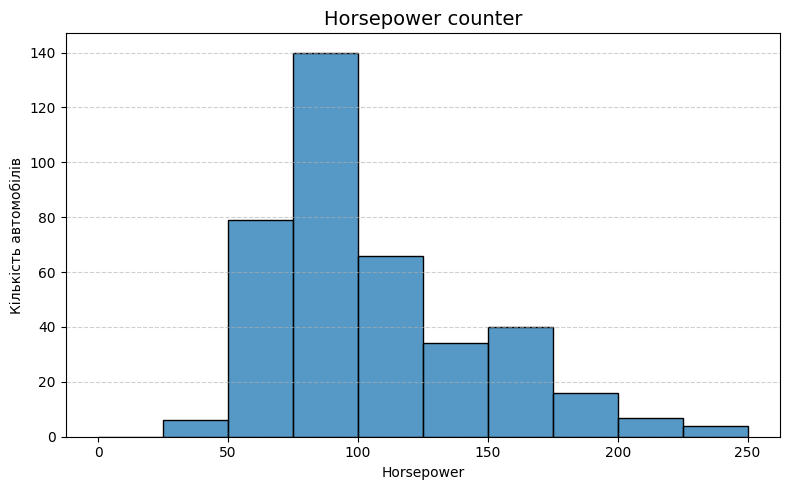

In [90]:
my_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
plt.figure(figsize=(8, 5))
sns.histplot(df['horsepower'], bins=my_bins)
plt.title('Horsepower counter', fontsize=14)
plt.xlabel('Horsepower')
plt.ylabel('Кількість автомобілів')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Збудувати графік залежності одного integer/real атрибута від іншого.

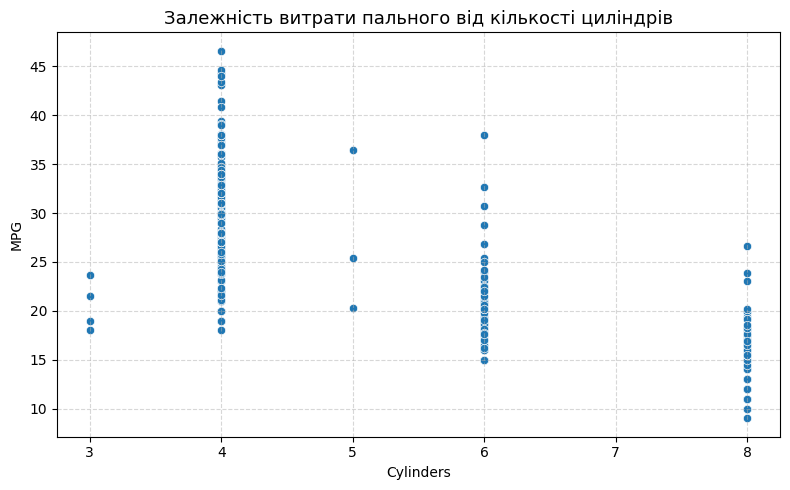

In [78]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df, x='cylinders', y='mpg')
plt.title('Залежність витрати пального від кількості циліндрів', fontsize=13)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [93]:
pearson_corr, pearson_p = pearsonr(df['horsepower'], df['mpg'])

spearman_corr, spearman_p = spearmanr(df['horsepower'], df['mpg'])

print(f"Коефіцієнт Пірсона: {pearson_corr:.4f} (p-value: {pearson_p:.4g})")
print(f"Коефіцієнт Спірмена: {spearman_corr:.4f} (p-value: {spearman_p:.4g})")

Коефіцієнт Пірсона: -0.7784 (p-value: 7.032e-81)
Коефіцієнт Спірмена: -0.8536 (p-value: 1.619e-112)


Провести One Hot Encoding категоріального string атрибуту.

In [80]:
df_copy = df
df_copy['brand'] = df_copy['car name'].str.split().str[0]
df_encoded = pd.get_dummies(df_copy, columns=['brand'])
print(df_encoded.filter(like='brand_').head())

   brand_amc  brand_audi  brand_bmw  brand_buick  brand_cadillac  brand_capri  \
0      False       False      False        False           False        False   
1      False       False      False         True           False        False   
2      False       False      False        False           False        False   
3       True       False      False        False           False        False   
4      False       False      False        False           False        False   

   brand_chevroelt  brand_chevrolet  brand_chevy  brand_chrysler  ...  \
0            False             True        False           False  ...   
1            False            False        False           False  ...   
2            False            False        False           False  ...   
3            False            False        False           False  ...   
4            False            False        False           False  ...   

   brand_renault  brand_saab  brand_subaru  brand_toyota  brand_toyouta  \

Провести візуалізацію багатовимірних даних

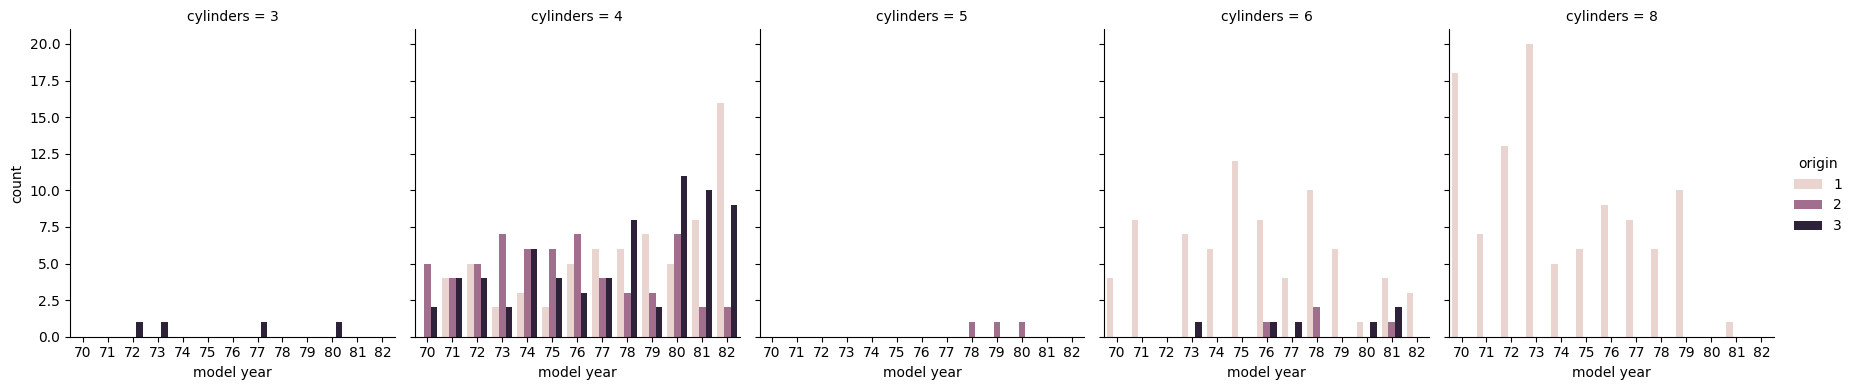

In [81]:
sns.catplot(df, x="model year", kind="count", hue="origin", col="cylinders", height=4, aspect=0.9)
plt.show()

### За допомогою numpy array

Поборотися із зниклими даними

In [ ]:
data_file = "./Data/auto-mpg.data"
headers = "mpg\tcylinders\tdisplacement\thorsepower\tweight\tacceleration\tmodel_year\torigin\tcar_name\n"
types = [("mpg","float64"), ("cylinders", "float64"), ("displacement", "float64"), 
("horsepower", "float64"), ("weight","float64"), ("acceleration", "float64"), 
("model_year", "float64"), ("origin", "float64"), ("car_name", "U64")]

cleaned_file = "./Data/auto-mpg-cleaned.data"
with open(data_file, encoding="utf-8") as fin, open(cleaned_file, "w", encoding="utf-8") as fout:
    fout.write(headers)
    for line in fin:
        cleaned = re.sub(r'\s{2,}', '\t', line.strip())
        fout.write(cleaned + "\n")

df = np.genfromtxt(cleaned_file, missing_values=["?"], delimiter="\t", dtype=types, encoding="UTF=8", names=True)

numeric_fields = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

for field in numeric_fields:
    nan_count = np.isnan(df[field]).sum()
    print(f"{field}: {nan_count}")

not_null = ~np.isnan([df[field] for field in numeric_fields]).any(axis=0)
df = df[not_null]

print("______________________________")
for field in numeric_fields:
    nan_count = np.isnan(df[field]).sum()
    print(f"{field}: {nan_count}")

print(df)

mpg: 0
cylinders: 0
displacement: 0
horsepower: 6
weight: 0
acceleration: 0
model_year: 0
origin: 0
______________________________
mpg: 0
cylinders: 0
displacement: 0
horsepower: 0
weight: 0
acceleration: 0
model_year: 0
origin: 0
[(18. , 8., 307. , 130., 3504., 12. , 70., 1., '"chevrolet chevelle malibu"')
 (15. , 8., 350. , 165., 3693., 11.5, 70., 1., '"buick skylark 320"')
 (18. , 8., 318. , 150., 3436., 11. , 70., 1., '"plymouth satellite"')
 (16. , 8., 304. , 150., 3433., 12. , 70., 1., '"amc rebel sst"')
 (17. , 8., 302. , 140., 3449., 10.5, 70., 1., '"ford torino"')
 (15. , 8., 429. , 198., 4341., 10. , 70., 1., '"ford galaxie 500"')
 (14. , 8., 454. , 220., 4354.,  9. , 70., 1., '"chevrolet impala"')
 (14. , 8., 440. , 215., 4312.,  8.5, 70., 1., '"plymouth fury iii"')
 (14. , 8., 455. , 225., 4425., 10. , 70., 1., '"pontiac catalina"')
 (15. , 8., 390. , 190., 3850.,  8.5, 70., 1., '"amc ambassador dpl"')
 (15. , 8., 383. , 170., 3563., 10. , 70., 1., '"dodge challenger se"')


Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [ ]:
def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

def standardize(arr):
    return (arr - np.mean(arr)) / np.std(arr)

cylinders_normal = normalize(df['cylinders'])
cylinders_standard = standardize(df['cylinders'])

new_dtype = df.dtype.descr + [('cylinders_normal', 'f8'), ('cylinders_standard', 'f8')]

new_df = np.empty(df.shape, dtype=new_dtype)

for name in df.dtype.names:
    new_df[name] = df[name]

new_df['cylinders_normal'] = cylinders_normal
new_df['cylinders_standard'] = cylinders_standard

print(new_df)

[(18. , 8., 307. , 130., 3504., 12. , 70., 1., '"chevrolet chevelle malibu"', 1. ,  1.48394702)
 (15. , 8., 350. , 165., 3693., 11.5, 70., 1., '"buick skylark 320"', 1. ,  1.48394702)
 (18. , 8., 318. , 150., 3436., 11. , 70., 1., '"plymouth satellite"', 1. ,  1.48394702)
 (16. , 8., 304. , 150., 3433., 12. , 70., 1., '"amc rebel sst"', 1. ,  1.48394702)
 (17. , 8., 302. , 140., 3449., 10.5, 70., 1., '"ford torino"', 1. ,  1.48394702)
 (15. , 8., 429. , 198., 4341., 10. , 70., 1., '"ford galaxie 500"', 1. ,  1.48394702)
 (14. , 8., 454. , 220., 4354.,  9. , 70., 1., '"chevrolet impala"', 1. ,  1.48394702)
 (14. , 8., 440. , 215., 4312.,  8.5, 70., 1., '"plymouth fury iii"', 1. ,  1.48394702)
 (14. , 8., 455. , 225., 4425., 10. , 70., 1., '"pontiac catalina"', 1. ,  1.48394702)
 (15. , 8., 390. , 190., 3850.,  8.5, 70., 1., '"amc ambassador dpl"', 1. ,  1.48394702)
 (15. , 8., 383. , 170., 3563., 10. , 70., 1., '"dodge challenger se"', 1. ,  1.48394702)
 (14. , 8., 340. , 160., 3609.,  

Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

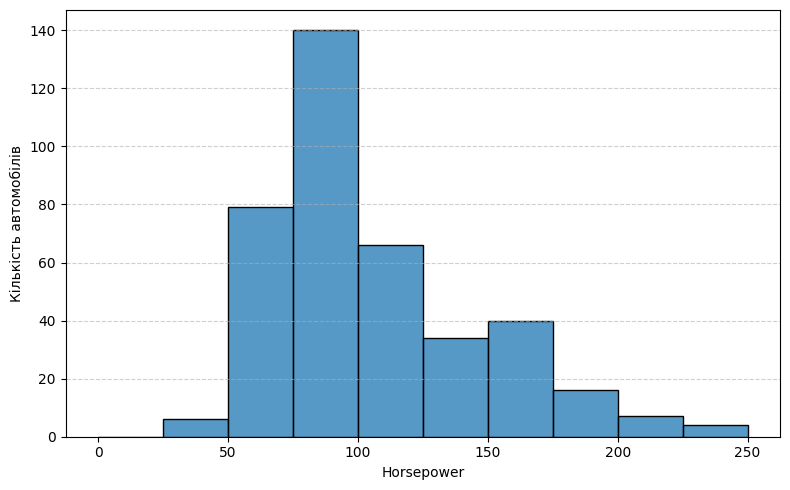

In [97]:
my_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
plt.figure(figsize=(8, 5))
sns.histplot(df['horsepower'], bins=my_bins)
plt.xlabel('Horsepower')
plt.ylabel('Кількість автомобілів')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Збудувати графік залежності одного integer/real атрибута від іншого.

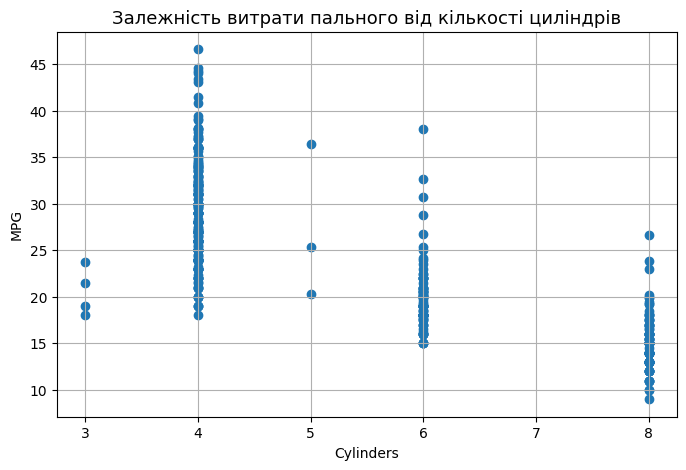

In [96]:
plt.figure(figsize=(8, 5))
plt.scatter(df['cylinders'], df['mpg'])
plt.title('Залежність витрати пального від кількості циліндрів', fontsize=13)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [86]:
pearson_corr, pearson_p = pearsonr(df['horsepower'], df['mpg'])

spearman_corr, spearman_p = spearmanr(df['horsepower'], df['mpg'])

print(f"Коефіцієнт Пірсона: {pearson_corr:.4f} (p-value: {pearson_p:.4g})")
print(f"Коефіцієнт Спірмена: {spearman_corr:.4f} (p-value: {spearman_p:.4g})")

Коефіцієнт Пірсона: -0.7784 (p-value: 7.032e-81)
Коефіцієнт Спірмена: -0.8536 (p-value: 1.619e-112)


Провести One Hot Encoding категоріального string атрибуту.

In [87]:
car_names = df['car_name']
brands = np.array([name.split()[0] for name in car_names])
unique_brands = np.unique(brands)

one_hot = np.zeros((len(brands), len(unique_brands)), dtype=bool)
for i, brand in enumerate(brands):
    idx = np.where(unique_brands == brand)[0][0]
    one_hot[i, idx] = True

header = [f"brand_{b}" for b in unique_brands]
print("\t".join(header))
for i in range(5):
    row = one_hot[i]
    row_str = "\t\t".join(["True" if val else "False" for val in row])
    print(row_str)

brand_"amc	brand_"audi	brand_"bmw	brand_"buick	brand_"cadillac	brand_"capri	brand_"chevroelt	brand_"chevrolet	brand_"chevy	brand_"chrysler	brand_"datsun	brand_"dodge	brand_"fiat	brand_"ford	brand_"hi	brand_"honda	brand_"maxda	brand_"mazda	brand_"mercedes	brand_"mercedes-benz	brand_"mercury	brand_"nissan	brand_"oldsmobile	brand_"opel	brand_"peugeot	brand_"plymouth	brand_"pontiac	brand_"renault	brand_"saab	brand_"subaru	brand_"subaru"	brand_"toyota	brand_"toyouta	brand_"triumph	brand_"vokswagen	brand_"volkswagen	brand_"volvo	brand_"vw
False		False		False		False		False		False		False		True		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False
False		False		False		True		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		False		Fa

Провести візуалізацію багатовимірних даних

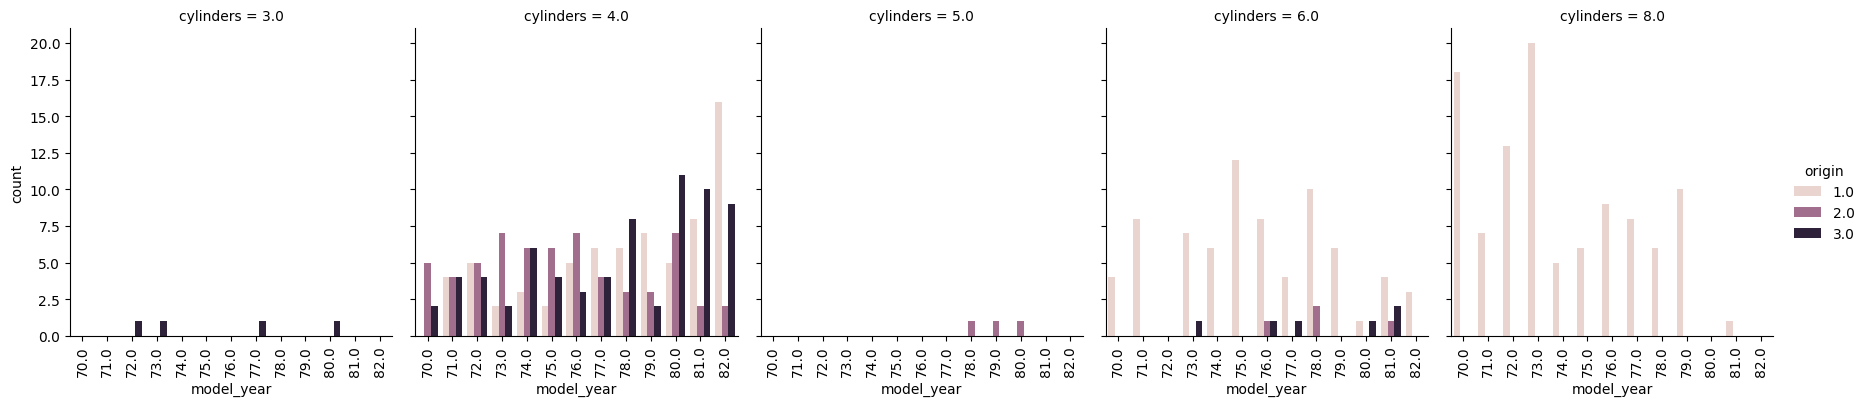

In [88]:
data = {
    "model_year": df["model_year"],
    "cylinders": df["cylinders"],
    "origin": df["origin"]
}

graph = sns.catplot(data, x="model_year", kind="count", hue="origin", col="cylinders", height=4, aspect=0.9)
for ax in graph.axes.flat:
    ax.tick_params(axis='x', rotation=90)
plt.show()